# Linear Regression Part 2


## Gradient Descent in Python-I

[Gradient descent article](https://towardsdatascience.com/implement-gradient-descent-in-python-9b93ed7108d1)
>Let's start implementing the cost function for linear regression, which is also known as MSE (Mean Squared Error). MSE computes the 'goodness of fit' for a fitted line. The cost function takes two values, i.e. $(m,c)$ where m is the coefficient and c is the intercept. The cost function iterates through each point in the given dataset and then computes the sum of the square distance between each point and the line.

$$J(m,c) = \sum_{i=1}^n (Y_{i} - (mx_{i} + c)^2$$


**Why MSE ?**



Our goal is to minimise the cost function, which will result in lower error values. If we minimise the cost function, we will get the best fit line to our data. 

Gradient descent is an optimisation algorithm used to find the values of the parameters (coefficients) of a function (f) that minimises a cost function. To run gradient descent on the error function above, you first need to compute its gradient. To calculate it, you will need to differentiate your error function. Since the function is defined by two parameters (m and c), you need to compute a partial derivative for each.

[Image Link](https://cdn.upgrad.com/UpGrad/temp/16690301-2e9b-4916-91f9-8c1078df17f0/gd2.PNG)

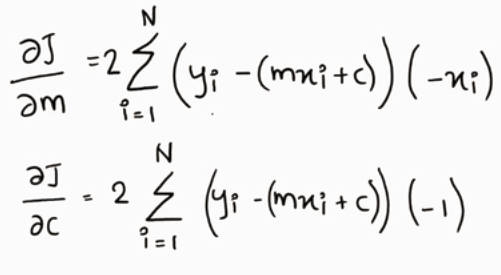

Now, we will iterate and update m and c to get the lower error value than the value from the previous iteration.

Let's now implement the concept above in Python:

``` 
def gradient(X, y, m_current=0, c_current=0, iters=1000, learning_rate=0.001):
    N = float(len(y))    
    gd_df = pd.DataFrame( columns = ['m_current', 'c_current','cost'])    
    for i in range(iters):        
        y_current = (m_current * X) + c_current       
        cost = sum([data**2 for data in (y-y_current)]) / N      
        m_gradient = -(2/N) * sum(X * (y - y_current))        
        c_gradient = -(2/N) * sum(y - y_current)        
        m_current = m_current - (learning_rate * m_gradient)       
        c_current = c_current - (learning_rate * c_gradient)       
        gd_df.loc[i] = [m_current,c_current,cost]    
        return(gd_df)

```


The 'learning_rate' variable controls the steps we take in downward direction in each iteration. If 'learning_rate' is too low, the algorithm may take longer to reach the minimum value. On the other hand, if it is high, the algorithm may overstep the minimum value.

 The 'm_gradient' variable corresponds to $\frac{d J}{dm}$ and 'c_gradient' corresponds to $\frac{d J}{dc}$. Moreover, m_current and c_current correspond to the steps in which we are updating the values.

[Link](https://cdn.upgrad.com/UpGrad/temp/468b8210-636c-4757-8078-f2b66ee2c719/graph.PNG)

![Link](https://cdn.upgrad.com/UpGrad/temp/468b8210-636c-4757-8078-f2b66ee2c719/graph.PNG)


The graph above shows how the cost decreases as we increase the number of iterations. The graph above explains the concept of gradient descent, which is to find out the values of the coefficient by minimising the cost function.

## Gradient Descent Implementation

In [ ]:
#Importing the dataset
import pandas as pd
housing = pd.read_csv('Housing.csv')
housing.head()

In [ ]:
# Converting Yes to 1 and No to 0
housing['mainroad'] = housing['mainroad'].map({'yes': 1, 'no': 0})
housing['guestroom'] = housing['guestroom'].map({'yes': 1, 'no': 0})
housing['basement'] = housing['basement'].map({'yes': 1, 'no': 0})
housing['hotwaterheating'] = housing['hotwaterheating'].map({'yes': 1, 'no': 0})
housing['airconditioning'] = housing['airconditioning'].map({'yes': 1, 'no': 0})
housing['prefarea'] = housing['prefarea'].map({'yes': 1, 'no': 0})

In [ ]:
#Converting furnishingstatus column to binary column using get_dummies
status = pd.get_dummies(housing['furnishingstatus'],drop_first=True)
housing = pd.concat([housing,status],axis=1)
housing.drop(['furnishingstatus'],axis=1,inplace=True)

In [ ]:
housing.head()

In [ ]:
# Normalisisng the data
housing = (housing - housing.mean())/housing.std()
housing.head()

In [ ]:
# Simple linear regression
# Assign feature variable X
X = housing['area']

# Assign response variable to y
y = housing['price']

In [ ]:
# Conventional way to import seaborn
import seaborn as sns

# To visualise in the notebook
%matplotlib inline

In [ ]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(housing, x_vars='area', y_vars='price',size=7, aspect=0.7, kind='scatter')

Now we will apply partial derivative with respect to m and c and will equate it to zero to find the least value of m and c for which our cost function get the lowest value as possible.

[image Link](http://localhost:8888/notebooks/Documents/Chrome%20browser%20Downloads/Gradient%20Descent%20Updated/gd2.png)
![image](http://localhost:8888/notebooks/Documents/Chrome%20browser%20Downloads/Gradient%20Descent%20Updated/gd2.png)

Now to apply gradient descent from scratch we need our X and y variables as numpy arrays, Let's convert them.

In [ ]:
import numpy as np
X = np.array(X)
y = np.array(y)

In [ ]:
# Implement gradient descent function
# Takes in X, y, current m and c (both initialised to 0), num_iterations, learning rate
# returns gradient at current m and c for each pair of m and c

def gradient(X, y, m_current=0, c_current=0, iters=1000, learning_rate=0.01):
    N = float(len(y))
    gd_df = pd.DataFrame( columns = ['m_current', 'c_current','cost'])
    for i in range(iters):
        y_current = (m_current * X) + c_current
        cost = sum([data**2 for data in (y-y_current)]) / N
        m_gradient = -(2/N) * sum(X * (y - y_current))
        c_gradient = -(2/N) * sum(y - y_current)
        m_current = m_current - (learning_rate * m_gradient)
        c_current = c_current - (learning_rate * c_gradient)
        gd_df.loc[i] = [m_current,c_current,cost]
    return(gd_df)

In [ ]:
# print gradients at multiple (m, c) pairs
# notice that gradient decreased gradually towards 0
# we have used 1000 iterations, can use more if needed
gradients = gradient(X,y)
gradients

In [ ]:
# plotting cost against num_iterations
gradients.reset_index().plot.line(x='index', y=['cost'])

### Multiple Regression: Applying Gradient Descent for Multiple (>1) Features


In [ ]:
# Assigning feature variable X
X = housing[['area','bedrooms']]

# Assigning response variable y
y = housing['price']

In [ ]:
# Add a columns of 1s as an intercept to X.
# The intercept column is needed for convenient matrix representation of cost function

X['intercept'] = 1
X = X.reindex_axis(['intercept','area','bedrooms'], axis=1)
X.head()

In [ ]:
# Convert X and y to arrays
import numpy as np
X = np.array(X)
y = np.array(y)

In [ ]:
# Theta is the vector representing coefficients (intercept, area, bedrooms)
theta = np.matrix(np.array([0,0,0])) 
alpha = 0.01
iterations = 1000

In [ ]:
# define cost function
# takes in theta (current values of coefficients b0, b1, b2), X and y
# returns total cost at current b0, b1, b2

def compute_cost(X, y, theta):
    return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))

More on [Numpy Matmul](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html)

[Image Link](http://localhost:8888/notebooks/Documents/Chrome%20browser%20Downloads/Gradient%20Descent%20Updated/gd.png)
![Image](http://localhost:8888/notebooks/Documents/Chrome%20browser%20Downloads/Gradient%20Descent%20Updated/gd.png)

In [ ]:
# gradient descent
# takes in current X, y, learning rate alpha, num_iters
# returns cost (notice it uses the cost function defined above)

def gradient_descent_multi(X, y, theta, alpha, iterations):
    theta = np.zeros(X.shape[1])
    m = len(X)
    gdm_df = pd.DataFrame( columns = ['Bets','cost'])

    for i in range(iterations):
        gradient = (1/m) * np.matmul(X.T, np.matmul(X, theta) - y)
        theta = theta - alpha * gradient
        cost = compute_cost(X, y, theta)
        gdm_df.loc[i] = [theta,cost]

    return gdm_df

In [ ]:
# print costs with various values of coefficients b0, b1, b2
gradient_descent_multi(X, y, theta, alpha, iterations)

In [ ]:
# print cost
gradient_descent_multi(X, y, theta, alpha, iterations).reset_index().plot.line(x='index', y=['cost'])

## Gradient Descent in Python-II


In the previous segment, you implemented gradient descent for simple linear regression. In this segment, we will implement gradient descent for multiple linear regression. We also know that in multiple linear regression, we have more than one predictors.

 

For multiple linear regression, the cost function looks like the following:

[Link](https://cdn.upgrad.com/UpGrad/temp/f2ea0820-43bb-4e6d-9ede-0955eaea1c7d/cost+function.PNG)



![Link](https://cdn.upgrad.com/UpGrad/temp/f2ea0820-43bb-4e6d-9ede-0955eaea1c7d/cost+function.PNG)


In the equation above, $x^{i}$ is the column vector of all the feature inputs of the $i^th$ training example, 
$m$ is the number of training examples, 
$h_{\theta}$ is the prediction from our regression model, and 
$y^i$ is the column vector of the dependent variable.


The dataset is a collection of data points of $(x^{i},y^i)$.Once you have a model $h_{\theta}$ the least squares error of $h_{\theta}$ on a single data point is $ (h_{\theta}x^{i}-y^i)^2$

Now, if you simply sum up the errors and multiply by half (1/2), we get the total error of 
$1/2 \sum_  (h_{\theta}x^{i}-y^i)^2$  
but if you divide it by the number of summands, you would get the average error per data point of $1/2m \sum_  (h_{\theta}x^{i}-y^i)^2$  
The reason for dividing the error by half (1/2) is to get a nice interpretation for minimising (half) the average error per data point.

Now, let's write the Python code for the cost function explained above:

```

def compute_cost(X, y, theta):    
    return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))
    
```


To learn more about np.matmul, read the article here [Link](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html)

In the cost function above, the hypothesis or the predicted value is given by the following linear model:

$$ h_{\theta}x^{i} = \theta^T x^i $$

$ x^i $ here is the matrix consisting of the 1st row as the coefficient on intercept, i.e, 1 and the rest values are the values of the different features. 

We need to minimise the cost function $J(\theta)$. One way to do this is to use the batch gradient decent algorithm. In batch gradient decent, the values are updated in each iteration:
[Link](https://cdn.upgrad.com/UpGrad/temp/5afbe3ae-6707-470d-8aec-9863b0a639bb/gd.PNG)

![Link](https://cdn.upgrad.com/UpGrad/temp/5afbe3ae-6707-470d-8aec-9863b0a639bb/gd.PNG)


With each iteration, the parameter comes θ closer to the optimal value that will achieve the lowest cost 
$J(\theta)$.

 

Now, let's look at how to implement this in Python

```
def gradient_descent_multi(X, y, theta, alpha, iterations):    theta = np.zeros(X.shape[1])    m = len(X)    gdm_df = pd.DataFrame( columns = ['Bets','cost'])    for i in range(iterations):        gradient = (1/m) * np.matmul(X.T, np.matmul(X, theta) - y)        theta = theta - alpha * gradient        cost = compute_cost(X, y, theta)        gdm_df.loc[i] = [theta,cost]    return gdm_df
```


The code above will iterate and update the cost function $J(\theta)$
The code above will generate a data frame, which is used to plot the cost function against the number of iterations.

[Link](https://cdn.upgrad.com/UpGrad/temp/d0710dfd-badb-443a-854e-13ff4c068898/G2.PNG)

![Link](https://cdn.upgrad.com/UpGrad/temp/d0710dfd-badb-443a-854e-13ff4c068898/G2.PNG)

In the graph above, we can observe that after 200 iterations the cost function is getting flattened. Thus, we can get the global minimum before it completes 200 iterations.

 

The learning rate and the number of iteration have a direct effect on the shape of the graph you get. Note that the graph may vary from the above shown as we change the learning rate and the number of iterations.